In [1]:
import os
import pandas as pd
import collections
import json
import numpy as np

In [2]:
os.path.exists('raw/reexport')

True

In [3]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
label2id = {
    'dát_tăng_sắc_tố_(vết_thâm)': 0,
    'sang_thương_viêm_(sẩn,_mụn_mủ,_mảng_viêm_đỏ)': 1,
    'sẹo_mụn_(lõm,_lồi)': 2,
    'còi_(đóng/mở)': 3,
    'sang_thương_nang_và_nốt': 4,
}

In [5]:
id2label = {
    0: 'vet_tham',
    1: 'thuong_viem',
    2: 'seo_mun',
    3: 'coi',
    4: 'thuong_nang'
}
id2label

{0: 'vet_tham', 1: 'thuong_viem', 2: 'seo_mun', 3: 'coi', 4: 'thuong_nang'}

In [6]:
grad_d = pd.read_csv('grade.xls', index_col=0)
grad_d = grad_d.rename(columns={'Grade': 'grading', 'ID': 'id'})
grad_d = grad_d[grad_d['grading'].isin(['0','1','2','3','4'])]
grad_d

,id,grading,c0,c1,c2,c3,c4
0,cklmbf086000i3a62l63tud9h,1,1,1,0,2,0
1,cklmfyw2600003b68ypk1esxh,0,0,0,0,0,0
2,ckln4c4v3000h3a68a9nb5wja,1,0,1,1,3,0
3,ckln4ezzy00193a68viu41oqj,1,5,1,0,1,0
4,ckln4sz6200323a68fz6m63z4,1,3,1,9,4,0
...,...,...,...,...,...,...,...
1601,ckmq560k804sk3a68bulpkbbe,2,39,34,67,2,0
1602,ckmq59np904x43a68i1gnrqf6,2,22,9,4,8,0
1603,ckmq5dvek053j3a68wj7r47n5,2,53,5,2,1,0
1604,ckmr1x2tz00cx3a68u202gpzs,2,123,4,6,21,0


In [8]:
final = grad_d
final

,id,grading,c0,c1,c2,c3,c4
0,cklmbf086000i3a62l63tud9h,1,1,1,0,2,0
1,cklmfyw2600003b68ypk1esxh,0,0,0,0,0,0
2,ckln4c4v3000h3a68a9nb5wja,1,0,1,1,3,0
3,ckln4ezzy00193a68viu41oqj,1,5,1,0,1,0
4,ckln4sz6200323a68fz6m63z4,1,3,1,9,4,0
...,...,...,...,...,...,...,...
1601,ckmq560k804sk3a68bulpkbbe,2,39,34,67,2,0
1602,ckmq59np904x43a68i1gnrqf6,2,22,9,4,8,0
1603,ckmq5dvek053j3a68wj7r47n5,2,53,5,2,1,0
1604,ckmr1x2tz00cx3a68u202gpzs,2,123,4,6,21,0


In [10]:
final = final[final['grading'].notnull()]
final = final[final['grading'].isin(['0','1','2','3','4'])]

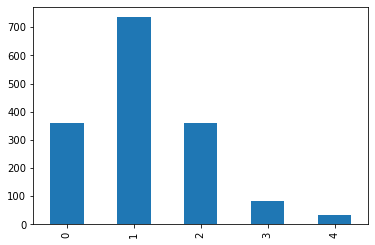

In [12]:
final['grading'].value_counts().sort_index().plot(kind='bar')

In [13]:
final['grading'].value_counts().sort_index()

0    361
1    735
2    361
3     83
4     35
Name: grading, dtype: int64

In [14]:
final['grading'].value_counts(normalize=True).sort_index()

0    0.229206
1    0.466667
2    0.229206
3    0.052698
4    0.022222
Name: grading, dtype: float64

In [15]:
# final.to_pickle('grade_severity')

In [16]:
# # impute to noise data
# final['s0'] = 0
# final['s2'] = 0
# final['s3'] = 0

In [17]:
final

,id,grading,c0,c1,c2,c3,c4
0,cklmbf086000i3a62l63tud9h,1,1,1,0,2,0
1,cklmfyw2600003b68ypk1esxh,0,0,0,0,0,0
2,ckln4c4v3000h3a68a9nb5wja,1,0,1,1,3,0
3,ckln4ezzy00193a68viu41oqj,1,5,1,0,1,0
4,ckln4sz6200323a68fz6m63z4,1,3,1,9,4,0
...,...,...,...,...,...,...,...
1601,ckmq560k804sk3a68bulpkbbe,2,39,34,67,2,0
1602,ckmq59np904x43a68i1gnrqf6,2,22,9,4,8,0
1603,ckmq5dvek053j3a68wj7r47n5,2,53,5,2,1,0
1604,ckmr1x2tz00cx3a68u202gpzs,2,123,4,6,21,0


In [18]:
x = final[['c0','c1','c2','c3','c4']].values
y = final['grading'].values

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

from lightgbm import LGBMClassifier

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')


In [21]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [22]:
model = LGBMClassifier()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [24]:
model.fit(x_train, y_train)

LGBMClassifier()

In [25]:
from lightgbm import LGBMClassifier

In [26]:
import joblib

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.91      0.89      0.90       192
           2       0.91      0.97      0.94        86
           3       0.83      0.90      0.86        21
           4       1.00      0.60      0.75        10

    accuracy                           0.89       394
   macro avg       0.89      0.84      0.86       394
weighted avg       0.89      0.89      0.89       394

[[ 72  13   0   0   0]
 [ 15 170   7   0   0]
 [  0   1  83   2   0]
 [  0   1   1  19   0]
 [  1   1   0   2   6]]


In [40]:
accuracy_score(y_test, y_pred)

0.8883248730964467

In [50]:
from datetime import datetime
joblib.dump(model, 'lgbm_20211223')

['lgbm_20211223']

Normalized confusion matrix
[[0.84705882 0.15294118 0.         0.         0.        ]
 [0.078125   0.88541667 0.03645833 0.         0.        ]
 [0.         0.01162791 0.96511628 0.02325581 0.        ]
 [0.         0.04761905 0.04761905 0.9047619  0.        ]
 [0.1        0.1        0.         0.2        0.6       ]]


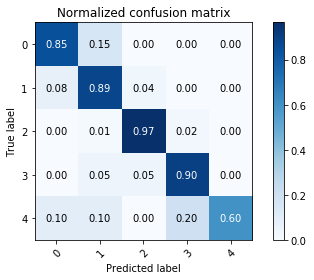

In [41]:
plot_confusion_matrix(y_test, y_pred, [0,1,2,3,4], normalize=True)

Confusion matrix, without normalization
[[ 72  13   0   0   0]
 [ 15 170   7   0   0]
 [  0   1  83   2   0]
 [  0   1   1  19   0]
 [  1   1   0   2   6]]


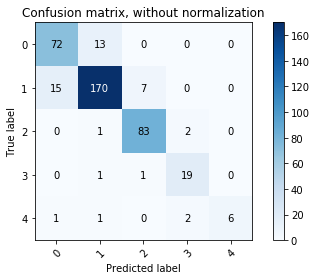

In [42]:
plot_confusion_matrix(y_test, y_pred, [0,1,2,3,4], normalize=False)

In [43]:
# AUC

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_test_ohv = enc.fit_transform(y_test.reshape(-1,1)).toarray()
y_test_ohv

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[2.14533896e-01, 7.85376457e-01, 6.86064506e-05, 1.57385321e-05,
        5.30210580e-06],
       [6.68042445e-05, 9.99890804e-01, 4.06364488e-05, 1.22018239e-06,
        5.34832151e-07],
       [8.99652831e-01, 1.00307895e-01, 2.88005029e-05, 7.28476965e-06,
        3.18929061e-06],
       ...,
       [2.95321933e-04, 9.57165201e-01, 4.25297101e-02, 6.18218010e-06,
        3.58501544e-06],
       [9.87589787e-01, 1.23956631e-02, 1.12951030e-05, 2.08021411e-06,
        1.17481997e-06],
       [4.64928067e-05, 9.99895709e-01, 5.35112034e-05, 2.23472349e-06,
        2.05268990e-06]])

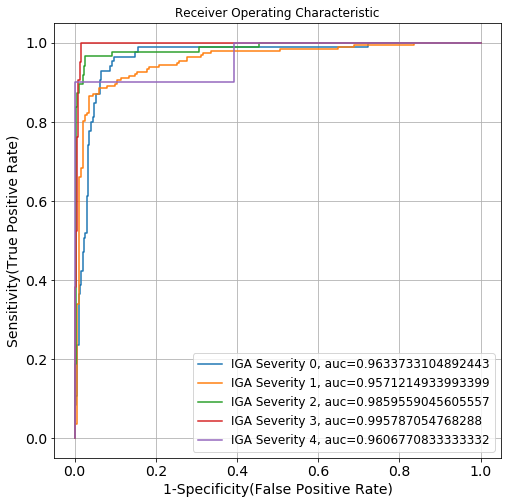

In [46]:
import matplotlib.pyplot as plt
from sklearn import metrics

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.figure(figsize=(8, 8))

plt.rc('figure', titlesize=24)  # fontsize of the figure title
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

for i in range(0, 5):
    fpr, tpr, thresh = metrics.roc_curve(y_test_ohv[:,i], y_pred_proba[:, i])
    auc = metrics.roc_auc_score(y_test_ohv[:,i], y_pred_proba[:, i])
    plt.plot(fpr,tpr,label=f"IGA Severity {i}, auc={auc}")
plt.legend(loc=0)
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.show()